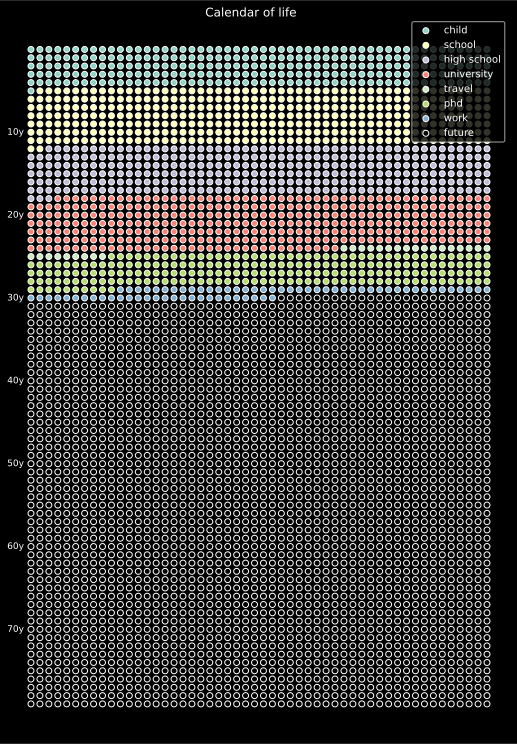

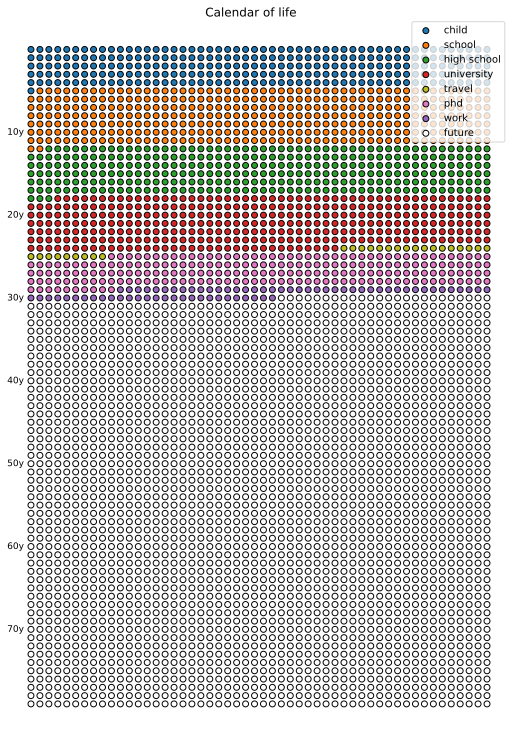

In [14]:
%config InlineBackend.figure_formats = ['svg']

from collections import defaultdict
import datetime
import numpy as np
import bisect
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

for dark_mode in [True, False]:
    if dark_mode:
        fname = "calendar-of-life-dark.png"
        plt.style.use("dark_background")
        face = "k"
        edge = "w"
    else:
        fname = "calendar-of-life.png"
        plt.rcParams.update(plt.rcParamsDefault)
        face = "w"
        edge = "k"

    h, w = 13, 9
    fig, ax = plt.subplots(figsize=(w, h))
    ax.set_axis_off()
    fig.suptitle("Calendar of life", y=0.89)
    birthday = datetime.date(1990, 12, 28)
    today = datetime.date.today()
    life = [
        ("born", birthday),
        ("child", birthday + datetime.timedelta(days=5 * 365)),
        ("school", birthday + datetime.timedelta(days=12 * 365)),
        ("high school", birthday + datetime.timedelta(days=18 * 365)),
        ("university", datetime.date(2015, 8, 1)),
        ("travel", datetime.date(2016, 2, 1)),
        ("phd", datetime.date(2020, 2, 1)),
        ("work", today),
    ]

    stages = [key for key, date in life]
    weeks_of_life = [round((date - birthday).days / 7) for key, date in life]
    weeks_of_life_past = np.cumsum(np.diff(weeks_of_life))

    data = defaultdict(list)
    colors = {
        "child": "C0",
        "school": "C1",
        "high school": "C2",
        "university": "C3",
        "travel": "C8",
        "phd": "C6",
        "work": "C4",
        "future": face,
    }
    week_num = 0
    weeks = np.linspace(0, h, 52)
    years = np.linspace(w, 0, 80)
    for i, year in enumerate(years):
        for j, week in enumerate(weeks):
            week_num += 1
            index = bisect.bisect_left(weeks_of_life_past, week_num) + 1
            if index == len(weeks_of_life_past) + 1:
                stage = "future"
            else:
                stage = stages[index]
            data[stage].append((week, year))

    for k, v in data.items():
        ax.scatter(*zip(*v), edgecolors=edge, facecolor=colors[k], label=k)

    for i, year in enumerate(years):
        if i % 10 == 0 and i > 0:
            ax.text(
                -0.2,
                year,
                f"{i}y",
                horizontalalignment="right",
                verticalalignment="center",
                fontsize=9,
            )
    plt.legend()
    plt.savefig(fname, dpi=300)
    plt.show()